In [3]:
!python --version

Python 3.8.12


In [4]:
%pip install mutagen
%pip install pydub
%pip install noisereduce
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\fiansyah\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\fiansyah\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\fiansyah\anaconda3\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\fiansyah\anaconda3\python.exe -m pip install --upgrade pip' command.


In [31]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
import mutagen
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from mutagen.wave import WAVE
from pydub import AudioSegment
import matplotlib.pyplot as plt
import librosa
import numpy as np
import librosa.display
import os
from tensorflow.keras import models
from flask import Flask, request
import cv2
from tensorflow.keras.preprocessing.image import img_to_array

In [6]:
induk = "E:\\Capstone_Project\\runningan"
os.chdir(f'{induk}')

In [8]:
# Importing relevant libraries
induk = "E:\\Capstone_Project\\runningan"
import subprocess
import os
from os import walk
import csv
import os
import shutil

In [ ]:
source_path = f'{induk}\\speech_spectogram'

source_path_depression = os.path.join(source_path, 'Depression')
source_path_normal = os.path.join(source_path, 'Normal')

source_folder_depression = f"E:\\Capstone_Project\\Depressionvsnormal_spectogram\\Depression"
destination_folder_depression = source_path_depression
source_folder_normal = f"E:\\Capstone_Project\\Depressionvsnormal_spectogram\\Normal"
destination_folder_normal = source_path_normal

# fetch all files

shutil.copytree(source_folder_depression, destination_folder_depression)
shutil.copytree(source_folder_normal, destination_folder_normal)


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir( destination_folder_depression))} images of Depression.")
print(f"There are {len(os.listdir(destination_folder_normal))} images of Normal.")

In [9]:
# Define root directory
root_dir = f'{induk}\\depressionvsnormal\\'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_test_dirs
def create_train_test_dirs(root_path):
  ### START CODE HERE

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter
  os.makedirs(os.path.join(root_path, "training/"))
  os.makedirs(os.path.join(root_path, "testing/"))
  os.makedirs(os.path.join(root_path, "training/Depression/"))
  os.makedirs(os.path.join(root_path, "testing/Depression/"))
  os.makedirs(os.path.join(root_path, "training/Normal/"))
  os.makedirs(os.path.join(root_path, "testing/Normal/"))
  pass
  
  ### END CODE HERE

  
try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [10]:
# Test your create_train_test_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

E:\Capstone_Project\runningan\depressionvsnormal\testing
E:\Capstone_Project\runningan\depressionvsnormal\training
E:\Capstone_Project\runningan\depressionvsnormal\testing\Depression
E:\Capstone_Project\runningan\depressionvsnormal\testing\Normal
E:\Capstone_Project\runningan\depressionvsnormal\training\Depression
E:\Capstone_Project\runningan\depressionvsnormal\training\Normal


In [11]:
# GRADED FUNCTION: split_data
from shutil import copyfile
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  ### START CODE HERE
  file_dipakai = []
  for file in os.listdir(SOURCE):
    full_file_address= SOURCE + file
    if os.path.getsize(full_file_address)>0:
      file_dipakai.append(file)
    else:
      print(f"{file} is zero length, so ignoring.")
  
  jumlah_training = int(int(len(file_dipakai))*SPLIT_SIZE)
  jumlah_testing = int(int(len(file_dipakai)-jumlah_training))
  file_dipakai_sudah_random = random.sample(file_dipakai, len(file_dipakai))
  files_training = file_dipakai_sudah_random[0:jumlah_training]
  files_testing = file_dipakai_sudah_random[-jumlah_testing:]

  for file_training in files_training:
    try:
      file = SOURCE + file_training
      tempat_copy= TRAINING + file_training
      copyfile(file, tempat_copy)
    except:
      pass
  for file_testing in files_testing:
    try:
      file = SOURCE + file_testing
      tempat_copy= TESTING + file_testing
      copyfile(file, tempat_copy)
    except:
      pass

In [12]:
import random
# Test your split_data function
TRAINING_DIR = "E:\\Capstone_Project\\runningan\\depressionvsnormal\\training\\"
TESTING_DIR = "E:\\Capstone_Project\\runningan\\depressionvsnormal\\testing\\"

# Define paths
DEPRESSION_SOURCE_DIR = "E:\\Capstone_Project\\runningan\\speech_spectogram\\Depression\\"
TRAINING_DEPRESSIONS_DIR = os.path.join(TRAINING_DIR, "Depression\\")
TESTING_DEPRESSIONS_DIR = os.path.join(TESTING_DIR, "Depression\\")

NORMAL_SOURCE_DIR = "E:\\Capstone_Project\\runningan\\speech_spectogram\\Normal\\"
TRAINING_NORMAL_DIR = os.path.join(TRAINING_DIR, "Normal\\")
TESTING_NORMAL_DIR = os.path.join(TESTING_DIR, "Normal\\")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_DEPRESSIONS_DIR)) > 0:
  for file in os.scandir(TRAINING_DEPRESSIONS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_DEPRESSIONS_DIR)) > 0:
  for file in os.scandir(TESTING_DEPRESSIONS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_NORMAL_DIR)) > 0:
  for file in os.scandir(TRAINING_NORMAL_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_NORMAL_DIR)) > 0:
  for file in os.scandir(TESTING_NORMAL_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(DEPRESSION_SOURCE_DIR, TRAINING_DEPRESSIONS_DIR, TESTING_DEPRESSIONS_DIR, split_size)
split_data(NORMAL_SOURCE_DIR, TRAINING_NORMAL_DIR, TESTING_NORMAL_DIR, split_size)

# Check that the number of images matches the expected output
print(f"There are {len(os.listdir(TRAINING_DEPRESSIONS_DIR))} images of depression for training")
print(f"There are {len(os.listdir(TESTING_DEPRESSIONS_DIR))} images of depression for testing")
print(f"There are {len(os.listdir(TRAINING_NORMAL_DIR))} images of normal for training")
print(f"There are {len(os.listdir(TESTING_NORMAL_DIR))} images of normal for testing")

There are 3292 images of depression for training
There are 366 images of depression for testing
There are 4706 images of normal for training
There are 523 images of normal for testing


In [12]:


def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale=1.0/255.)

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=10,
                                                      class_mode='binary',
                                                      color_mode = 'rgb',
                                                      shuffle=True,
                                                      seed=42,
                                                      target_size=(512, 512))

                                                           
     

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255.)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                      batch_size=10,
                                                      class_mode='binary',
                                                      color_mode = 'rgb',
                                                      shuffle=True,
                                                      seed=42,
                                                      target_size=(512, 512))
  
  ### END CODE HERE
  return train_generator, validation_generator


In [13]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 7998 images belonging to 2 classes.
Found 889 images belonging to 2 classes.


In [14]:
%pip install keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\fiansyah\anaconda3\python.exe -m pip install --upgrade pip' command.


In [15]:
import pathlib
import numpy as np

data_dir = pathlib.Path(TESTING_DIR)
commands = np.array(tf.io.gfile.listdir(str(data_dir)))
num_labels = len(commands)
print('Commands:', commands)

filenames = tf.io.gfile.glob(str(data_dir) + '/*/*')
filenames = tf.random.shuffle(filenames)
num_samples = len(filenames)
print('Number of total examples:', num_samples)
print('Number of examples per label:',
      len(tf.io.gfile.listdir(str(data_dir / commands[0]))))
print('Example file tensor:', filenames[0])

Commands: ['Depression' 'Normal']
Number of total examples: 889
Number of examples per label: 366
Example file tensor: tf.Tensor(b'E:\\Capstone_Project\\runningan\\depressionvsnormal\\testing\\Normal\\Normal102.jpg', shape=(), dtype=string)


In [25]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional

def create_model():
  model = tf.keras.models.Sequential([ 
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(512,512,3)),
  tf.keras.layers.Conv2D(4, 2, strides=(1, 1),padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2),),
  tf.keras.layers.Conv2D(8, 3, strides=(1, 1),padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2),),
  tf.keras.layers.Conv2D(16, 4, strides=(1, 1),padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2),),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_labels, activation='softmax'),
  ])
  
  opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(
    optimizer=opt,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],)
  return model


In [26]:
model = create_model()
model.summary()
print()

# Train the model
# Note that this may take some time.
EPOCHS = 1
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 512, 512, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 512, 512, 4)       52        
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 256, 256, 4)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 256, 256, 8)       296       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 128, 128, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 128, 16)     

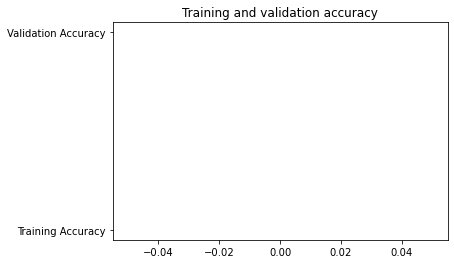

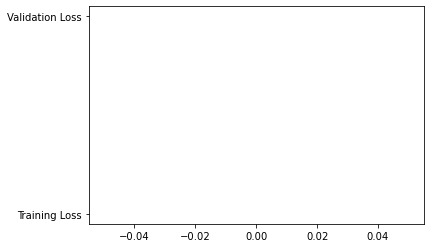

In [27]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [28]:
# EXERCISE: Save the trained model as a Keras HDF5 file. 

saved_model_path = "E:\\Capstone_Project\\modelh5\\predictive_model.h5"
model.save(saved_model_path)
# YOUR CODE HERE

In [29]:
def get_spectrogram_and_label_id(audio_file, label):
    spectrogram = audio_file
    spectrogram = tf.expand_dims(spectrogram, -1)
    label_id = tf.argmax(label == commands)
    return spectrogram, label_id

def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2]

def get_waveform_and_label(file_path):
    label = get_label(file_path)
    audio_binary = tf.io.read_file(file_path)
    waveform = file_path
    return waveform, label

def preprocess_dataset(files):
    files_ds = tf.data.Dataset.from_tensor_slices(files)
    output_ds = files_ds.map(get_waveform_and_label, num_parallel_calls=AUTOTUNE)
    output_ds = output_ds.map(
        get_spectrogram_and_label_id, num_parallel_calls=AUTOTUNE)
    return output_ds

def transformator(file):
    IMG_PATH = file
    image = cv2.imread(IMG_PATH)
    image = cv2.resize(image, (512, 512))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    return image

AUTOTUNE = tf.data.AUTOTUNE
test_files = filenames
test_ds = preprocess_dataset(test_files)

test_audio = []
test_labels = []
for audio, label in test_ds.as_numpy_iterator():
    test_audio.append(str(audio[0].decode("utf-8")))
    test_labels.append(label)

# Normal [1] , Depresi [0]

In [36]:
benar = 0
salah = 0
for i in range(800):
    y_pred = np.argmax(model.predict(transformator(test_audio[i])), axis=1)
    y_true = test_labels[i]
    if str(y_pred[0]) == str(y_true):
       benar+=1
    else:
       salah+=1
keakuratan = benar/(benar+salah) *100
print("keakuratan {} %".format(keakuratan))
#memprediksi testing 81.5% benar untuk keseluruhan training

1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 72ms/step
keakuratan 81.75 %


In [118]:
def identifikasi_gambar(gambar):
    y_pred = np.argmax(model.predict(transformator(gambar)), axis=1)
    if str(y_pred[0]) == "1":
       label_nama = "Normal"
    else:
       label_nama = "Depresi"
    return label_nama

In [130]:
Depresi = 0
Salah = 0

for i in range(3000):
    try:
        gambar = "E:\\Capstone_Project\\runningan\\depressionvsnormal\\testing\Depression\\Depression{}.jpg".format(i)
        resp = identifikasi_gambar(gambar)
        if resp == "Depresi":
            Depresi+=1
        else:
            Salah+=1
    except:
        print("")
        
totalpersen = Depresi / (Depresi+Salah)*100
print(Depresi)
print(Salah)
print(totalpersen)
#memprediksi testing 85% benar untuk cek depresi untuk  keseluruhan testin


1/1 [==============================] - 0s 46ms/step











1/1 [==============================] - 0s 63ms/step









1/1 [==============================] - 0s 122ms/step



1/1 [==============================] - 0s 50ms/step



1/1 [==============================] - 0s 70ms/step








1/1 [==============================] - 0s 55ms/step




1/1 [==============================] - 0s 53ms/step







1/1 [==============================] - 0s 58ms/step















1/1 [==============================] - 0s 50ms/step




1/1 [==============================] - 0s 54ms/step













1/1 [==============================] - 0s 68ms/step











1/1 [==============================] - 0s 56ms/step
















1/1 [==============================] - 0s 57ms/step









1/1 [==============================] - 0s 75ms/step









1/1 [==============================] - 0s 56ms/step


















1/1 [==============================] - 0s 58ms/step


1/1 [===================

1/1 [==============================] - 0s 72ms/step















1/1 [==============================] - 0s 59ms/step
















1/1 [==============================] - 0s 58ms/step







1/1 [==============================] - 0s 53ms/step












1/1 [==============================] - 0s 58ms/step




1/1 [==============================] - 0s 56ms/step









1/1 [==============================] - 0s 78ms/step











1/1 [==============================] - 0s 45ms/step









































1/1 [==============================] - 0s 44ms/step







1/1 [==============================] - 0s 76ms/step











1/1 [==============================] - 0s 77ms/step















1/1 [==============================] - 0s 65ms/step

















1/1 [==============================] - 0s 47ms/step






1/1 [==============================] - 0s 47ms/step

1/1 [==============================] - 0s 44ms/step

































1/1 [==========

1/1 [==============================] - 0s 61ms/step








1/1 [==============================] - 0s 36ms/step






























1/1 [==============================] - 0s 51ms/step









1/1 [==============================] - 0s 63ms/step




1/1 [==============================] - 0s 58ms/step





1/1 [==============================] - 0s 51ms/step






1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 55ms/step









1/1 [==============================] - 0s 57ms/step





1/1 [==============================] - 0s 54ms/step



1/1 [==============================] - 0s 56ms/step





1/1 [==============================] - 0s 59ms/step




1/1 [==============================] - 0s 59ms/step










1/1 [==============================] - 0s 50ms/step


















1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 60ms/step






1/1 [==============================] - 0s 

In [133]:
Depresi = 0
Salah = 0
for i in range(5000):
    try:
        gambar = "E:\\Capstone_Project\\runningan\\depressionvsnormal\\testing\\Normal\\Normal{}.jpg".format(i)
        resp = identifikasi_gambar(gambar)
        if resp == "Normal":
            Depresi+=1
        else:
            Salah+=1
    except:
        print("")
        
totalpersen = Depresi / (Depresi+Salah)*100
print(Depresi)
print(Salah)
print(totalpersen)
#memprediksi testing 78% benar untuk cek normal untuk keseluruhan testing


1/1 [==============================] - 0s 40ms/step







1/1 [==============================] - 0s 57ms/step







1/1 [==============================] - 0s 38ms/step




1/1 [==============================] - 0s 61ms/step











1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 40ms/step

1/1 [==============================] - 0s 55ms/step






















1/1 [==============================] - 0s 55ms/step



























1/1 [==============================] - 0s 61ms/step





1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 60ms/step






1/1 [==============================] - 0s 51ms/step





1/1 [==============================] - 0s 48ms/step










1/1 [==============================] - 0s 60ms/step













1/1 [==============================] - 0s 49ms/step






1/1 [==============================] - 0s 52ms/step












1/1 [======================

1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 52ms/step





1/1 [==============================] - 0s 49ms/step
















1/1 [==============================] - 0s 62ms/step




1/1 [==============================] - 0s 54ms/step















1/1 [==============================] - 0s 57ms/step







1/1 [==============================] - 0s 50ms/step










1/1 [==============================] - 0s 62ms/step




1/1 [==============================] - 0s 58ms/step





1/1 [==============================] - 0s 60ms/step




































1/1 [==============================] - 0s 55ms/step












1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 54ms/step





1/1 [==============================] - 0s 51ms/step

1/1 [==============================] - 0s 58ms/step








1/1 [==============================] - 0s 54ms/step




1/1 [===========================

1/1 [==============================] - 0s 70ms/step








1/1 [==============================] - 0s 53ms/step



1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 47ms/step



1/1 [==============================] - 0s 40ms/step




1/1 [==============================] - 0s 71ms/step




1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 43ms/step







1/1 [==============================] - 0s 61ms/step



1/1 [==============================] - 0s 42ms/step







1/1 [==============================] - 0s 66ms/step






1/1 [==============================] - 0s 62ms/step





1/1 [==============================] - 0s 54ms/step




1/1 [==============================] - 0s 55ms/step













































1/1 [==============================] - 0s 35ms/step

































1/1 [=========================

1/1 [==============================] - 0s 81ms/step







1/1 [==============================] - 0s 78ms/step






















1/1 [==============================] - 0s 47ms/step



1/1 [==============================] - 0s 47ms/step












1/1 [==============================] - 0s 37ms/step







1/1 [==============================] - 0s 37ms/step

1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 67ms/step
























1/1 [==============================] - 0s 66ms/step





1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 63ms/step










1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 47ms/step




1/1 [==============================] - 0s 47ms/step

1/1 [==============================] - 0s 55ms/step
















1/1 [==============================] - 0s 36ms/step


















1/1 [===========================

In [104]:
!pip install keras
!pip install flask_cors

You should consider upgrading via the 'C:\Users\fiansyah\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\fiansyah\anaconda3\python.exe -m pip install --upgrade pip' command.
